# Decision Tree Implementation

For Iris dataset your task is to print steps for every split in the decision tree.

Your Project is divided in 2 parts -

1. Print the Decision tree steps as specified in the example below. This is of 80 marks in total.
2. Decision Tree Implementation:  Building actual decision tree for the dataset and then printing it.
   This is of 20 marks.

### Import Libraries

In [101]:
import numpy as np
import pandas as pd
from sklearn import datasets
import math

In [102]:
# load iris dataset
iris = datasets.load_iris()
print(iris.feature_names) # check feature name

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [103]:
# convert iris data into pandas dataframe
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
# here i have converted continuous data to discrete values of 1 ,2 ,3, 4 in each column
#if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label 1
#if (m + Mean_Value) <=val < Mean_Value then it is assigned label 2
#if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label 3
#if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label 4

def Label(value, *boundaries):
    if value < boundaries[0]:
        return 1
    elif value < boundaries[1]:
        return 2
    elif value < boundaries[2]:
        return 3
    else:
        return 4

In [105]:
def Labeled_data(iris_df, feature):
    # mean value
    Mean_Value = iris_df[feature].mean()
    # min value
    MIN_Value = iris_df[feature].min()
    # MAX_Value
    MAX_Value = iris_df[feature].max()
    
    #if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label 1
    first = (MIN_Value + Mean_Value)/2
    #if (m + Mean_Value) <=val < Mean_Value then it is assigned label 2
    second = Mean_Value
    #if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label 3
    third = (Mean_Value + MAX_Value)/2
    
    iris_df = iris_df[feature].apply(Label, args = (first, second, third))
    return iris_df

In [106]:
# ['sepal_len_labelled', 'sepal_wid_labelled', 'petal_len_labelled', 'petal_wid_labelled']
# ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# call Labeled_data 
iris_df['sepal_len_labelled'] = Labeled_data(iris_df, 'sepal_length')
iris_df['sepal_wid_labelled'] = Labeled_data(iris_df, 'sepal_width')
iris_df['petal_len_labelled'] = Labeled_data(iris_df, 'petal_length')
iris_df['petal_wid_labelled'] = Labeled_data(iris_df, 'petal_width')

In [107]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_len_labelled,sepal_wid_labelled,petal_len_labelled,petal_wid_labelled
0,5.1,3.5,1.4,0.2,2,3,1,1
1,4.9,3.0,1.4,0.2,1,2,1,1
2,4.7,3.2,1.3,0.2,1,3,1,1
3,4.6,3.1,1.5,0.2,1,3,1,1
4,5.0,3.6,1.4,0.2,1,3,1,1


In [108]:
# drop continuous value's columns
iris_df.drop(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], axis = 1, inplace = True)

In [109]:
iris_df.head()

,sepal_len_labelled,sepal_wid_labelled,petal_len_labelled,petal_wid_labelled
0,2,3,1,1
1,1,2,1,1
2,1,3,1,1
3,1,3,1,1
4,1,3,1,1


In [110]:
# convert y_train data into pd dataframe
Y = pd.DataFrame(iris.target, columns = ['output'])
Y.head()

,output
0,0
1,0
2,0
3,0
4,0


In [111]:
print('unique values = ' ,set(Y['output']))
print(iris.target_names)

unique values =  {0, 1, 2}
['setosa' 'versicolor' 'virginica']


In [112]:
Y[Y['output'] == 0] =  'setosa'
Y[Y['output'] == 1] = 'versicolor'
Y[Y['output'] == 2] = 'virginica'
Y.head()

,output
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [113]:
set(Y['output'])

{'setosa', 'versicolor', 'virginica'}

### Entropy

In [118]:
def entropy(y_train):
    # all data points present in y_train
    total_data_points = len(y_train)
    entropy = 0
    for i in set(y_train['output']):
        # counting accurance of label in y_train data
        count_class = len(y_train[y_train['output'] == i])
        probability = count_class / total_data_points
        # calculate entropy
        entropy += probability * math.log(probability, 2)
    entropy =  - entropy
    return entropy

### Information Gain

In [119]:
def Information_gain(x_train, y_train, features):
    # calculate entropy of y_train
    parent_entropy = entropy(y_train)
    # count number of labels present in y_train
    total_data_points = len(y_train)
    weighted_entropy = 0
    
    X = set(x_train[features])
    for i in X:
        child = y_train[x_train[features] == i]
        # call entropy fun
        child_entropy = entropy(child)
        weighted_entropy += (len(child)/total_data_points)*child_entropy
    # calculate Information gain
    information_gain = parent_entropy - weighted_entropy
    return information_gain

### Split Information

In [120]:
def Split_Info(x_train, y_train, features):
    total_data_points = len(y_train)
    weighted_avg = 0
    
    X = set(x_train[features])
    
    for i in X:
        child = y_train[x_train[features] == i]
        weighted_avg += (len(child)/total_data_points)*math.log((len(child)/total_data_points), 2)
        
    weighted_avg = - weighted_avg
    return weighted_avg

### Find Best Feature to split

In [121]:
def Best_Feature(x_train, y_train, features):
    best_feature = ""
    max_gain = -1
    
    for i in features:
        # calculate split info
        split_info = Split_Info(x_train, y_train, i)
        # calculate information gain
        info_gain = Information_gain(x_train, y_train, i)
        
        if split_info != 0:
            # Gain_ratio
            gain_ratio = info_gain/split_info
        else:
            gain_ratio = -1
            
            
        if gain_ratio > max_gain:
            best_feature = i
            max_gain = gain_ratio
    return best_feature, max_gain

In [122]:
def Decision_Tree(x_train, y_train, features, level):
    classes = set(y_train['output'])
    # all unique Labels present in Y_train
    # Now we need to handle all the cases whether we can split our tree or not
    # and we reached at Leaf Node or not
    
    # case-1 Pure Node
    if len(classes) == 1:
        print('Lavel ', level)
        Class = list(classes)[0]
        print('Count of ', Class, ' = ',len(y_train))
        print('Current Entropy  is = 0.0')
        print('Reached Leaf Node')
        print('Class Name ', Class)
        print()
        return
    
    # case-2 No More features, means length of features = 0, means we can't split further
    elif len(features) == 0:
        print("Level ", level)
        for curr_class in classes:
            count_curr_class = (y_train['output'] == curr_class).sum()
            print('Count of ', curr_class, ' = ',count_curr_class)
        # find entropy
        curr_entropy = entropy(y_train)
        print('Current Entropy  is ', curr_entropy)
        print('Reached Leaf Node')
        print('Class Name = ', curr_class)
        print()
        return
    # case-3 when features count is not 0 and don't have leaf node
    else:
        print('Level ', level)
        max_count = 0
        for i in classes:
            j = (y_train['output'] == i).sum()
            print('Count of ', i, ' = ', j)
            if j >= max_count :
                max_count = j
                output_class = i
        curr_entropy = entropy(y_train)
        print('Current Entropy  is ', curr_entropy)
        best_feature, gain_ratio = Best_Feature(x_train, y_train, features)
        print('Splitting on feature ', best_feature, ' with gain ratio ', gain_ratio)
        print()
        
        # splitting curr node on all different value
        # the best feature can have and recursively calling DT on each split
        diff_val_of_best_feature = set(x_train[best_feature])
        
        for curr_feature in diff_val_of_best_feature:
            x = x_train[(x_train[best_feature] == curr_feature)]
            y = y_train[(x_train[best_feature] == curr_feature)]
            # recursive call
            features = features - {best_feature}
            Decision_Tree(x, y, features, level + 1)
    return

In [124]:
features = set(iris_df.columns)
Decision_Tree(iris_df, Y, features, 0)

Level  0
Count of  versicolor  =  50
Count of  setosa  =  50
Count of  virginica  =  50
Current Entropy  is  1.584962500721156
Splitting on feature  petal_wid_labelled  with gain ratio  0.699638203622209

Lavel  1
Count of  setosa  =  50
Current Entropy  is = 0.0
Reached Leaf Node
Class Name  setosa

Lavel  1
Count of  versicolor  =  10
Current Entropy  is = 0.0
Reached Leaf Node
Class Name  versicolor

Level  1
Count of  versicolor  =  40
Count of  virginica  =  16
Current Entropy  is  0.863120568566631
Splitting on feature  petal_len_labelled  with gain ratio  0.4334099495621066

Lavel  2
Count of  versicolor  =  1
Current Entropy  is = 0.0
Reached Leaf Node
Class Name  versicolor

Level  2
Count of  versicolor  =  39
Count of  virginica  =  8
Current Entropy  is  0.6581912658132185
Splitting on feature  sepal_len_labelled  with gain ratio  0.12674503775809332

Lavel  3
Count of  virginica  =  1
Current Entropy  is = 0.0
Reached Leaf Node
Class Name  virginica

Lavel  3
Count of  ver

### Using sklearn Decision Tree Implementation

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

In [126]:
# train model
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [127]:
# prediction
y_train_pred = clf.predict(iris.data)

In [128]:
confusion_matrix(y_train_pred, iris.target)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

### Showing Iris Tree and save in pdf

In [133]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [134]:
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(clf, out_file = None,
                          feature_names = iris.feature_names,
                          class_names = iris.target_names)
# save iris_tree in pdf file 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris_data_Tree.pdf")

True

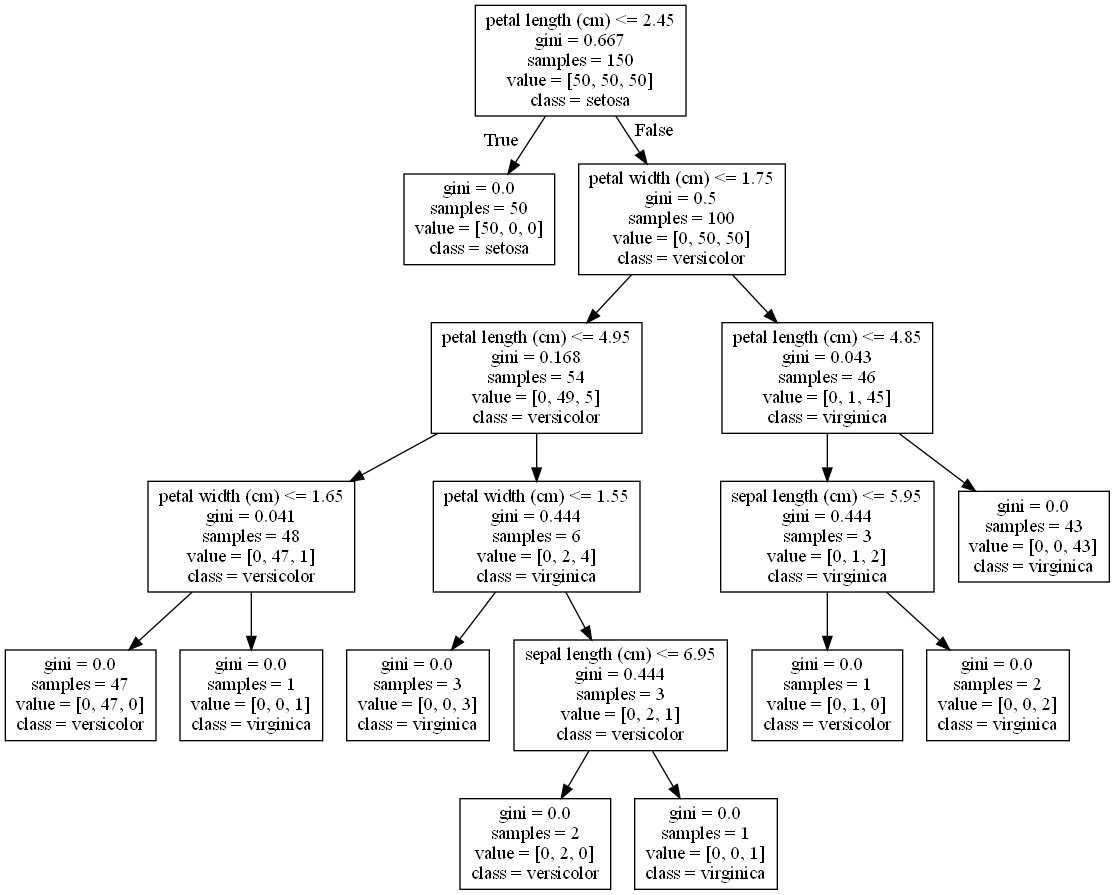

In [135]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### OR Data

In [80]:
OR_data = [[False ,False , False],
          [False ,True , True],
          [True ,False , True],
          [True ,True , False]]
OR_df = pd.DataFrame(OR_data, columns = ["X1", "X2", "Y(X1 OR X2)"])

In [81]:
OR_df

,X1,X2,Y(X1 OR X2)
0,False,False,False
1,False,True,True
2,True,False,True
3,True,True,False


In [82]:
x_train = OR_df.iloc[:, :-1]
y_train = OR_df.iloc[:, -1]

In [83]:
# train model
clf2 = DecisionTreeClassifier()
clf2.fit(x_train, y_train)

DecisionTreeClassifier()

In [84]:
# prediction
y_pred = clf2.predict(x_train)

In [85]:
confusion_matrix(y_pred, y_train)

array([[2, 0],
       [0, 2]], dtype=int64)

### Showing OR Tree and save in pdf

In [136]:
dot_data = export_graphviz(clf2, out_file = None,
                          feature_names = ["X1", "X2"],
                          class_names = ["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("OR_data_Tree.pdf")

True

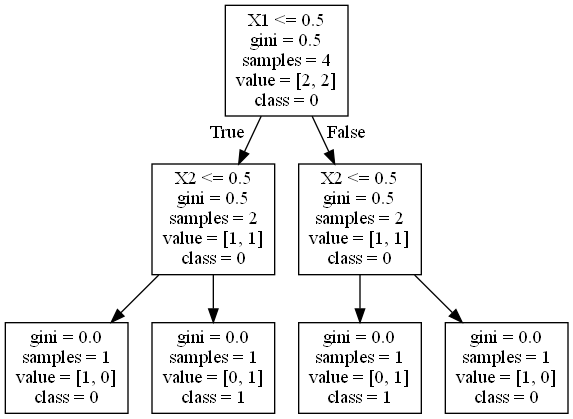

In [137]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())